Month
2018-03-01    266.0
2018-03-01    145.9
2018-03-01    183.1
2018-03-01    119.3
2018-03-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


C:\Users\jagrutip\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736754.0, right=736754.0
  'left=%s, right=%s') % (left, right))


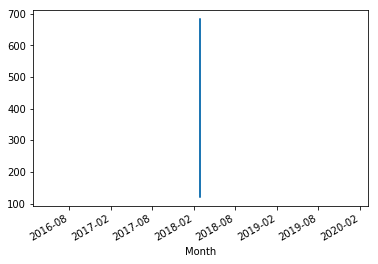

In [19]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime("1 Mar 18", "%d %b %y")
 
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Thu, 17 May 2018   AIC                            406.340
Time:                                                 16:58:46   BIC                            417.227
Sample:                                             03-01-2018   HQIC                           410.098
                                                  - 03-01-2018                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

C:\Users\jagrutip\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736754.0, right=736754.0
  'left=%s, right=%s') % (left, right))


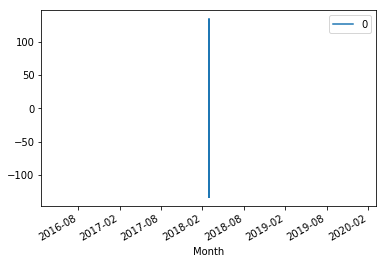

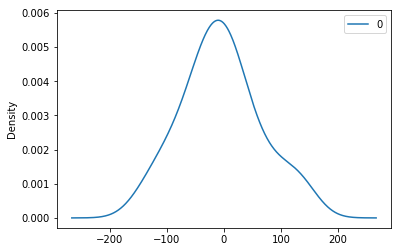

                0
count   35.000000
mean    -5.495219
std     68.132882
min   -133.296618
25%    -42.477906
50%     -7.186564
75%     24.748344
max    133.237976


In [22]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=349.117687, expected=342.300000
predicted=306.512943, expected=339.700000
predicted=387.376377, expected=440.400000
predicted=348.154171, expected=315.900000
predicted=386.308764, expected=439.300000
predicted=356.082043, expected=401.300000
predicted=446.379474, expected=437.400000
predicted=394.737326, expected=575.500000
predicted=434.915412, expected=407.600000
predicted=507.923418, expected=682.000000
predicted=435.483001, expected=475.300000
predicted=652.743789, expected=581.300000
predicted=546.343345, expected=646.900000
Test MSE: 6958.327


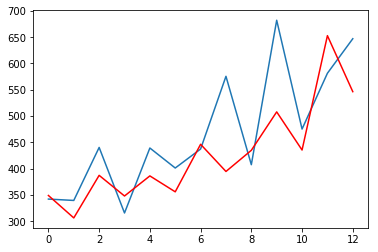

In [24]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime("1 Mar 18", "%d %b %y")
 
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()